# 문제 01 유형(DataSet_01.csv 이용)

In [1]:
# =============================================================================
# 구분자 : comma(“,”), 4,572 Rows, 5 Columns, UTF-8 인코딩
# 
# 글로벌 전자제품 제조회사에서 효과적인 마케팅 방법을 찾기
# 위해서 채널별 마케팅 예산과 매출금액과의 관계를 분석하고자
# 한다.
# 컬 럼 / 정 의  /   Type
# TV   /     TV 마케팅 예산 (억원)  /   Double
# Radio / 라디오 마케팅 예산 (억원)  /   Double
# Social_Media / 소셜미디어 마케팅 예산 (억원)  / Double
# Influencer / 인플루언서 마케팅
# (인플루언서의 영향력 크기에 따라 Mega / Macro / Micro / 
# Nano) / String

# SALES / 매출액 / Double
# =============================================================================

In [2]:
import pandas as pd
import numpy as np

import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


Bad key text.latex.preview in file C:\Users\spa84\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\spa84\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\spa84\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

In [5]:
%matplotlib inline

In [6]:
path = './Dataset/'

In [7]:
data1=pd.read_csv(path + 'Dataset_01.csv', na_values=['?', ' '])

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social_Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [9]:
data1.head()

,TV,Radio,Social_Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [10]:
pd.options.display.max_columns=None

In [11]:
# =============================================================================
# 1. 데이터 세트 내에 총 결측값의 개수는 몇 개인가? (답안 예시) 23
# =============================================================================

In [12]:
# sklearn : numpy 구조를 기본적으로 사용, 결측치 없어야 함, 2D, 입력 변수 순서가 동일해야 함
# statsmodels : Pandas 구조를 기본적으로 사용, 결측치가 있어도 내부적으로 자동 처리,
#               2D 구조가 아니어도 됨, 변수 순서가 동일하지 않아도 됨

In [13]:
data1.isnull().sum().sum()  # 답: 26

26

In [14]:
# 결측치가 있었던 값의 위치 이용하여 (변경) 값 확인
data1[data1.TV.isnull()]['TV']

13    NaN
26    NaN
46    NaN
75    NaN
99    NaN
119   NaN
141   NaN
163   NaN
183   NaN
210   NaN
Name: TV, dtype: float64

In [15]:
# 결측치 처리 방식

# 1. 제거: 전체가 결측치로 구성된 변수는 변수 제거, 변수별로 결측치 수가 정상 데이터보다 큰 경우는 변수 제거 (기준 30%)
# 2. 보정: 최대한 데이터의 패턴을 외곡하지 않는 범위 안에서 보정, 최대한 유사 데이터를 찾아서 참조하도록 설계

In [16]:
data01_1=data1.copy()

In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
data1.isnull().sum(axis=1).value_counts()

0    4546
1      26
dtype: int64

In [19]:
train=data01_1[~data01_1.isnull().any(axis=1)]
# train=data01_1[~data01_1.TV.isnull()]
test=data01_1[data01_1.TV.isnull()]

In [20]:
train.isnull().sum().sum()

0

In [21]:
len(train), len(test)

(4546, 10)

In [22]:
# ?KNeighborsRegressor

train.columns

Index(['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales'], dtype='object')

In [23]:
# 전처리: MinMaxScaler()
# 변수 축약: PCA

In [24]:
knn=KNeighborsRegressor(5).fit(train[['Radio', 'Social_Media']], train['TV'])

In [25]:
data01_1.loc[data01_1.TV.isnull(), 'TV']=knn.predict(test[['Radio', 'Social_Media']])

In [26]:
data01_1.TV.isnull().sum()

0

In [27]:
data01_1.loc[data01_1.TV.isnull(), 'TV']

Series([], Name: TV, dtype: float64)

In [28]:
data1.dropna(axis=0, how='any', subset=['TV','Radio'])

,TV,Radio,Social_Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [29]:
# =============================================================================
# 2. TV, Radio, Social Media 등 세 가지 다른 마케팅 채널의 예산과 매출액과의 상관분석을
# 통하여 각 채널이 매출에 어느 정도 연관이 있는지 알아보고자 한다. 
# - 매출액과 가장 강한 상관관계를 가지고 있는 채널의 상관계수를 소수점 5번째
# 자리에서 반올림하여 소수점 넷째 자리까지 기술하시오. (답안 예시) 0.1234
# =============================================================================

In [30]:
# 선형 회귀분석 전 체크 사항
# - 입력(독립)변수와 종속 변수 간에 선형의 관계 존재 유무
#   . 산점도, 상관계수
# - 영향력이 있는 입력 선정(변수 선택 기법)
# - 상관계수, 회귀분석 나온 p-value 이용해서 변수 선택, t-test, anova

In [31]:
pd.__version__

'1.3.2'

In [32]:
# data1.cov() # 공분산
q1_2_list=data1.columns[data1.dtypes != 'object']
q1_2_list

Index(['TV', 'Radio', 'Social_Media', 'Sales'], dtype='object')

In [33]:
data1[q1_2_list].corr() # 상관계수

,TV,Radio,Social_Media,Sales
TV,1.000000,0.869460,0.528168,0.999497
Radio,0.869460,1.000000,0.607452,0.869105
Social_Media,0.528168,0.607452,1.000000,0.528906
Sales,0.999497,0.869105,0.528906,1.000000


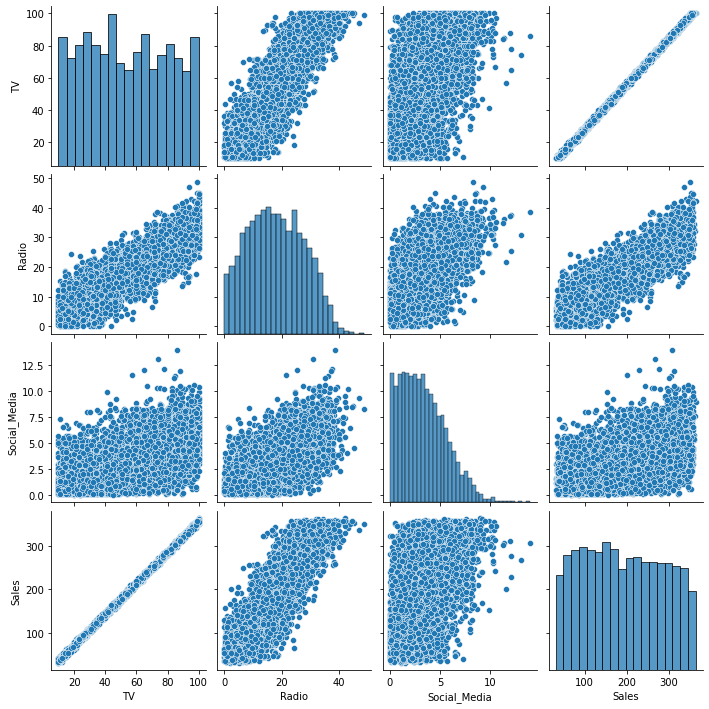

In [34]:
sns.pairplot(data1[q1_2_list])

In [35]:
q1_2=data1[q1_2_list].corr()['Sales'].drop('Sales').abs()

In [36]:
# .max()
# .idxmax()
# .argmax()
# .nlargest()

round(q1_2.max(),4) # 답: 0.9995

0.9995

In [37]:
q1_2.idxmax()

'TV'

In [38]:
q1_2.index[q1_2 >= 0.6]

Index(['TV', 'Radio'], dtype='object')

In [39]:
import scipy.stats as st

In [40]:
# ?st.pearsonr

In [41]:
temp=data1.dropna()
st.pearsonr(temp['TV'], temp['Sales'])

(0.9994973659385129, 0.0)

In [42]:
# =============================================================================
# 3. 매출액을 종속변수, TV, Radio, Social Media의 예산을 독립변수로 하여 회귀분석을
# 수행하였을 때, 세 개의 독립변수의 회귀계수를 큰 것에서부터 작은 것 순으로
# 기술하시오. 
# - 분석 시 결측치가 포함된 행은 제거한 후 진행하며, 회귀계수는 소수점 넷째 자리
# 이하는 버리고 소수점 셋째 자리까지 기술하시오. (답안 예시) 0.123
# =============================================================================

In [43]:
q1_3_list=['TV', 'Radio', 'Social_Media']

In [44]:
from sklearn.linear_model import LinearRegression # numpy

from statsmodels.formula.api import ols # DataFrame

In [45]:
q1_3=data1.dropna()

In [46]:
lm1=LinearRegression(fit_intercept=True).fit(q1_3[q1_3_list], q1_3['Sales'])

In [47]:
lm1.intercept_ # 절편, 상수항

-0.1339630519422883

In [48]:
lm1.coef_   # 회귀계수

array([ 3.56256963, -0.00397039,  0.00496402])

In [49]:
q1_3_out=pd.Series(lm1.coef_ , index=q1_3_list)
q1_3_out

TV              3.562570
Radio          -0.003970
Social_Media    0.004964
dtype: float64

In [50]:
np.trunc(q1_3_out.sort_values(ascending=False)) 

TV              3.0
Social_Media    0.0
Radio          -0.0
dtype: float64

In [51]:
np.trunc(q1_3_out.sort_values(ascending=False) * 1000 ) / 1000  # 답 순서대로 적기

TV              3.562
Social_Media    0.004
Radio          -0.003
dtype: float64

In [52]:
pred1=lm1.predict(q1_3[q1_3_list])
pred1

array([ 56.85551579,  46.15472574, 145.88277855, ..., 156.56578419,
       252.7484957 , 149.45561852])

In [53]:
q1_3.Sales - pred1

0      -2.122759
1       0.523171
2       4.295050
3       2.771852
4       3.316120
          ...   
4567    2.207216
4568   -3.657225
4569    7.065673
4570    0.861916
4571   -1.253204
Name: Sales, Length: 4546, dtype: float64

In [54]:
# SSE, MSE, MAE, RMSE, MAPE

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [56]:
np.sqrt(mean_squared_error(q1_3.Sales, pred1)), mean_absolute_error(q1_3.Sales, pred1)

(2.9485350404425974, 2.3645272000944217)

In [57]:
r2_score(q1_3.Sales, pred1)  # 결정계수 R^2

0.9989950217942258

# 문제 02 유형(DataSet_02.csv 이용)

In [58]:
# =============================================================================
# 구분자 : comma(“,”), 200 Rows, 6 Columns, UTF-8 인코딩

# 환자의 상태와 그에 따라 처방된 약에 대한 정보를 분석하고자한다
# 
# 컬 럼 / 정 의  / Type
# Age  / 연령 / Integer
# Sex / 성별 / String
# BP / 혈압 레벨 / String
# Cholesterol / 콜레스테롤 레벨 /  String
# Na_to_k / 혈액 내 칼륨에 대비한 나트륨 비율 / Double
# Drug / Drug Type / String
# =============================================================================
# =============================================================================

In [59]:
# =============================================================================
# 1.해당 데이터에 대한 EDA를 수행하고, 여성으로 혈압이 High, Cholesterol이 Normal인
# 환자의 전체에 대비한 비율이 얼마인지 소수점 네 번째 자리에서 반올림하여 소수점 셋째
# 자리까지 기술하시오. (답안 예시) 0.123
# =============================================================================

In [60]:
# =============================================================================
# 2. Age, Sex, BP, Cholesterol 및 Na_to_k 값이 Drug 타입에 영향을 미치는지 확인하기
# 위하여 아래와 같이 데이터를 변환하고 분석을 수행하시오. 
# - Age_gr 컬럼을 만들고, Age가 20 미만은 ‘10’, 20부터 30 미만은 ‘20’, 30부터 40 미만은
# ‘30’, 40부터 50 미만은 ‘40’, 50부터 60 미만은 ‘50’, 60이상은 ‘60’으로 변환하시오. 
# - Na_K_gr 컬럼을 만들고 Na_to_k 값이 10이하는 ‘Lv1’, 20이하는 ‘Lv2’, 30이하는 ‘Lv3’, 30 
# 초과는 ‘Lv4’로 변환하시오.
# - Sex, BP, Cholesterol, Age_gr, Na_K_gr이 Drug 변수와 영향이 있는지 독립성 검정을
# 수행하시오.
# - 검정 수행 결과, Drug 타입과 연관성이 있는 변수는 몇 개인가? 연관성이 있는 변수
# 가운데 가장 큰 p-value를 찾아 소수점 여섯 번째 자리 이하는 버리고 소수점 다섯
# 번째 자리까지 기술하시오.
# (답안 예시) 3, 1.23456
# =============================================================================


In [61]:
# =============================================================================
# 3.Sex, BP, Cholesterol 등 세 개의 변수를 다음과 같이 변환하고 의사결정나무를 이용한
# 분석을 수행하시오.
# - Sex는 M을 0, F를 1로 변환하여 Sex_cd 변수 생성
# - BP는 LOW는 0, NORMAL은 1 그리고 HIGH는 2로 변환하여 BP_cd 변수 생성
# - Cholesterol은 NORMAL은 0, HIGH는 1로 변환하여 Ch_cd 생성
# - Age, Na_to_k, Sex_cd, BP_cd, Ch_cd를 Feature로, Drug을 Label로 하여 의사결정나무를
# 수행하고 Root Node의 split feature와 split value를 기술하시오. 
# 이 때 split value는 소수점 셋째 자리까지 반올림하여 기술하시오. (답안 예시) Age, 
# 12.345
# =============================================================================

# 문제 03 유형(DataSet_03.csv 이용)

In [62]:
# =============================================================================
# 구분자 : comma(“,”), 5,001 Rows, 8 Columns, UTF-8 인코딩
# 안경 체인을 운영하고 있는 한 회사에서 고객 사진을 바탕으로 안경의 사이즈를
# 맞춤 제작하는 비즈니스를 기획하고 있다. 우선 데이터만으로 고객의 성별을
# 파악하는 것이 가능할 지를 연구하고자 한다.
#
# 컬 럼 / 정 의 / Type
# long_hair / 머리카락 길이 (0 – 길지 않은 경우 / 1 – 긴
# 경우) / Integer
# forehead_width_cm / 이마의 폭 (cm) / Double
# forehead_height_cm / 이마의 높이 (cm) / Double
# nose_wide / 코의 넓이 (0 – 넓지 않은 경우 / 1 – 넓은 경우) / Integer
# nose_long / 코의 길이 (0 – 길지 않은 경우 / 1 – 긴 경우) / Integer
# lips_thin / 입술이 얇은지 여부 0 – 얇지 않은 경우 / 1 –
# 얇은 경우) / Integer
# distance_nose_to_lip_long / 인중의 길이(0 – 인중이 짧은 경우 / 1 – 인중이
# 긴 경우) / Integer
# gender / 성별 (Female / Male) / String
# =============================================================================
# =============================================================================

In [63]:
# =============================================================================
# 1.이마의 폭(forehead_width_cm)과 높이(forehead_height_cm) 사이의
# 비율(forehead_ratio)에 대해서 평균으로부터 3 표준편차 밖의 경우를 이상치로
# 정의할 때, 이상치에 해당하는 데이터는 몇 개인가? (답안 예시) 10
# =============================================================================


In [64]:
# =============================================================================
# 2.성별에 따라 forehead_ratio 평균에 차이가 있는지 적절한 통계 검정을 수행하시오.
# - 검정은 이분산을 가정하고 수행한다.
# - 검정통계량의 추정치는 절대값을 취한 후 소수점 셋째 자리까지 반올림하여
# 기술하시오.
# - 신뢰수준 99%에서 양측 검정을 수행하고 결과는 귀무가설 기각의 경우 Y로, 그렇지
# 않을 경우 N으로 답하시오. (답안 예시) 1.234, Y
# =============================================================================

In [65]:
# =============================================================================
# 3.주어진 데이터를 사용하여 성별을 구분할 수 있는지 로지스틱 회귀분석을 적용하여
# 알아 보고자 한다. 
# - 데이터를 7대 3으로 나누어 각각 Train과 Test set로 사용한다. 이 때 seed는 123으로
# 한다.
# - 원 데이터에 있는 7개의 변수만 Feature로 사용하고 gender를 label로 사용한다.
# (forehead_ratio는 사용하지 않음)
# - 로지스틱 회귀분석 예측 함수와 Test dataset를 사용하여 예측을 수행하고 정확도를
# 평가한다. 이 때 임계값은 0.5를 사용한다. 
# - Male의 Precision 값을 소수점 둘째 자리까지 반올림하여 기술하시오. (답안 예시) 
# 0.12
# 
# 
# (참고) 
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# train_test_split 의 random_state = 123
# =============================================================================

 # 문제 04 유형(DataSet_04.csv 이용)

In [66]:
# =============================================================================
#구분자 : comma(“,”), 6,718 Rows, 4 Columns, UTF-8 인코딩

# 한국인의 식생활 변화가 건강에 미치는 영향을 분석하기에 앞서 육류
# 소비량에 대한 분석을 하려고 한다. 확보한 데이터는 세계 각국의 1인당
# 육류 소비량 데이터로 아래와 같은 내용을 담고 있다.

# 컬 럼 / 정 의 / Type
# LOCATION / 국가명 / String
# SUBJECT / 육류 종류 (BEEF / PIG / POULTRY / SHEEP) / String
# TIME / 연도 (1990 ~ 2026) / Integer
# Value / 1인당 육류 소비량 (KG) / Double
# =============================================================================
# =============================================================================

# (참고)
# #1
# import pandas as pd
# import numpy as np
# #2
# from scipy.stats import ttest_rel
# #3
# from sklearn.linear_model import LinearRegression

In [67]:
# 패키지 로딩 후 사용하기

In [69]:
data4=pd.read_csv('./Dataset/Dataset_04.csv')

In [70]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  6718 non-null   object 
 1   SUBJECT   6718 non-null   object 
 2   TIME      6718 non-null   int64  
 3   Value     6718 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 210.1+ KB


In [71]:
data4.LOCATION.unique()

array(['AUS', 'CAN', 'JPN', 'KOR', 'MEX', 'NZL', 'TUR', 'USA', 'DZA',
       'ARG', 'BGD', 'BRA', 'CHL', 'CHN', 'COL', 'EGY', 'ETH', 'GHA',
       'HTI', 'IND', 'IDN', 'IRN', 'ISR', 'KAZ', 'MYS', 'MOZ', 'NGA',
       'PAK', 'PRY', 'PER', 'PHL', 'RUS', 'SAU', 'ZAF', 'SDN', 'TZA',
       'THA', 'UKR', 'URY', 'VNM', 'ZMB', 'WLD', 'SSA', 'OECD', 'BRICS',
       'EU28'], dtype=object)

In [72]:
len(data4.LOCATION.unique()) * 4 * (2026-1990 +1)

6808

In [73]:
data4[['LOCATION', 'TIME']].value_counts()

LOCATION  TIME
MOZ       1990    4
PAK       2015    4
PHL       2017    4
          2016    4
          2015    4
                 ..
WLD       1994    3
          1992    2
AUS       1990    2
KOR       1990    2
OECD      1990    2
Length: 1689, dtype: int64

In [74]:
data4.groupby(['LOCATION', 'TIME']).apply(len)

LOCATION  TIME
ARG       1990    3
          1991    4
          1992    4
          1993    4
          1994    4
                 ..
ZMB       2022    4
          2023    4
          2024    4
          2025    4
          2026    4
Length: 1689, dtype: int64

In [75]:
# =============================================================================
# 1.한국인의 1인당 육류 소비량이 해가 갈수록 증가하는 것으로 보여 상관분석을 통하여
# 확인하려고 한다. 
# - 데이터 파일로부터 한국 데이터만 추출한다. 한국은 KOR로 표기되어 있다.
# - 년도별 육류 소비량 합계를 구하여 TIME과 Value간의 상관분석을 수행하고
# 상관계수를 소수점 셋째 자리에서 반올림하여 소수점 둘째 자리까지만 기술하시오. 
# (답안 예시) 0.55
# =============================================================================

In [76]:
q4_1 = data4[data4.LOCATION == "KOR"]

In [77]:
q4_1_out=q4_1.groupby('TIME')['Value'].sum().reset_index(drop=False)
# q4_1_out

In [78]:
round(q4_1_out.corr()['TIME']['Value'],2)  # 답 0.96

0.96

In [79]:
# =============================================================================
# 2. 한국 인근 국가 가운데 식생의 유사성이 상대적으로 높은 일본(JPN)과 비교하여, 
# 연도별 소비량에 평균 차이가 있는지 분석하고자 한다.
# - 두 국가의 육류별 소비량을 연도기준으로 비교하는 대응표본 t 검정을 수행하시오.
# - 두 국가 간의 연도별 소비량 차이가 없는 것으로 판단할 수 있는 육류 종류를 모두
# 적으시오. (알파벳 순서) (답안 예시) BEEF, PIG, POULTRY, SHEEP
# =============================================================================

In [80]:
# 단순임의 추출

np.random.RandomState(123).randint(1, 1001, 10)


array([511, 366, 383, 323, 989,  99, 743,  18, 596, 107])

In [81]:
sam=np.random.randint(1, 1001, 10)
xbar=sam.mean()
sam_var=sam.var()
sam_std=sam.std()

xbar, sam_std


(418.1, 241.10638730651664)

In [82]:
xbar_col=[]
var_col=[]
for i in range(1, 100001):
    sam=np.random.randint(1, 1001, 30)
    xbar=sam.mean()
    sam_var=sam.var()
    sam_std=sam.std()

    xbar_col.append(xbar)
    var_col.append(sam_var)        

(array([1.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 7.000e+00, 1.000e+01,
        2.300e+01, 5.000e+01, 6.200e+01, 1.560e+02, 2.200e+02, 4.040e+02,
        5.740e+02, 8.860e+02, 1.194e+03, 1.732e+03, 2.320e+03, 2.916e+03,
        3.709e+03, 4.531e+03, 5.256e+03, 6.014e+03, 6.536e+03, 7.064e+03,
        7.153e+03, 7.239e+03, 6.927e+03, 6.462e+03, 5.848e+03, 5.110e+03,
        4.393e+03, 3.492e+03, 2.738e+03, 2.161e+03, 1.542e+03, 1.095e+03,
        8.170e+02, 5.490e+02, 3.420e+02, 1.870e+02, 1.070e+02, 7.900e+01,
        4.000e+01, 2.600e+01, 1.200e+01, 6.000e+00, 5.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([261.8, 271.4, 281. , 290.6, 300.2, 309.8, 319.4, 329. , 338.6,
        348.2, 357.8, 367.4, 377. , 386.6, 396.2, 405.8, 415.4, 425. ,
        434.6, 444.2, 453.8, 463.4, 473. , 482.6, 492.2, 501.8, 511.4,
        521. , 530.6, 540.2, 549.8, 559.4, 569. , 578.6, 588.2, 597.8,
        607.4, 617. , 626.6, 636.2, 645.8, 655.4, 665. , 674.6, 684.2,
        693.8, 703.4,

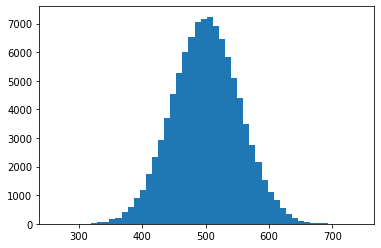

In [83]:
plt.hist(xbar_col, bins=50)

In [84]:
# 한국 인근 국가 가운데 식생의 유사성이 상대적으로 높은 일본(JPN)과 비교

q4_2 = data4[data4.LOCATION.isin(["KOR", "JPN"])]

In [85]:
len(data4), len(q4_2)

(6718, 294)

In [86]:
q4_2.LOCATION.value_counts()

JPN    148
KOR    146
Name: LOCATION, dtype: int64

In [87]:
data4.SUBJECT.unique()

array(['BEEF', 'PIG', 'POULTRY', 'SHEEP'], dtype=object)

In [88]:
from scipy.stats import ttest_rel

In [93]:
# H0 : 한국 BEEF 소비량 == 일본 BEEF 소비량 , 한국 BEEF 소비량 - 일본 BEEF 소비량 == 0
# H1 : 한국 BEEF 소비량 != 일본 BEEF 소비량, 한국 BEEF 소비량 - 일본 BEEF 소비량 != 0

temp=q4_2[q4_2.SUBJECT == 'BEEF']
tab=pd.pivot_table(data=temp, index='TIME' , columns='LOCATION', 
                   values='Value', aggfunc='mean').dropna()
# tab

ttest_rel(tab['JPN'], tab['KOR'])


Ttest_relResult(statistic=-3.956315918475474, pvalue=0.0003541915661863236)

In [ ]:
for 
temp=q4_2[q4_2.SUBJECT == 'BEEF']
tab=pd.pivot_table(data=temp, index='TIME' , columns='LOCATION', 
                   values='Value', aggfunc='mean').dropna()
# tab

ttest_rel(tab['JPN'], tab['KOR'])

In [ ]:
# =============================================================================
# 3.(한국만 포함한 데이터에서) Time을 독립변수로, Value를 종속변수로 하여 육류
# 종류(SUBJECT) 별로 회귀분석을 수행하였을 때, 가장 높은 결정계수를 가진 모델의
# 학습오차 중 MAPE를 반올림하여 소수점 둘째 자리까지 기술하시오. (답안 예시) 21.12
# (MAPE : Mean Absolute Percentage Error, 평균 절대 백분율 오차)
# (MAPE = Σ ( | y - y ̂ | / y ) * 100/n ))
# 
# =============================================================================

In [ ]:

# =============================================================================
# # 문제 05 유형(DataSet_05.csv 이용)
#

# 구분자 : comma(“,”), 8,068 Rows, 12 Columns, UTF-8 인코딩
#
# A자동차 회사는 신규 진입하는 시장에 기존 모델을 판매하기 위한 마케팅 전략을 
# 세우려고 한다. 기존 시장과 고객 특성이 유사하다는 전제 하에 기존 고객을 세분화하여
# 각 그룹의 특징을 파악하고, 이를 이용하여 신규 진입 시장의 마케팅 계획을 
# 수립하고자 한다. 다음은 기존 시장 고객에 대한 데이터이다.
#

# 컬 럼 / 정 의 / Type
# ID / 고유 식별자 / Double
# Age / 나이 / Double
# Age_gr / 나이 그룹 (10/20/30/40/50/60/70) / Double
# Gender / 성별 (여성 : 0 / 남성 : 1) / Double
# Work_Experience / 취업 연수 (0 ~ 14) / Double
# Family_Size / 가족 규모 (1 ~ 9) / Double
# Ever_Married / 결혼 여부 (Unknown : 0 / No : 1 / Yes : 2) / Double
# Graduated / 재학 중인지 여부 / Double
# Profession / 직업 (Unknown : 0 / Artist ~ Marketing 등 9개) / Double
# Spending_Score / 소비 점수 (Average : 0 / High : 1 / Low : 2) / Double
# Var_1 / 내용이 알려지지 않은 고객 분류 코드 (0 ~ 7) / Double
# Segmentation / 고객 세분화 결과 (A ~ D) / String
# =============================================================================
# =============================================================================


#(참고)
#1
# import pandas as pd
# #2
# from scipy.stats import chi2_contingency
# #3
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import export_graphviz
# import pydot


#%%

# =============================================================================
# 1.위의 표에 표시된 데이터 타입에 맞도록 전처리를 수행하였을 때, 데이터 파일 내에
# 존재하는 결측값은 모두 몇 개인가? 숫자형 데이터와 문자열 데이터의 결측값을
# 모두 더하여 답하시오.
# (String 타입 변수의 경우 White Space(Blank)를 결측으로 처리한다) (답안 예시) 123
# =============================================================================






#%%

# =============================================================================
# 2.이어지는 분석을 위해 결측값을 모두 삭제한다. 그리고, 성별이 세분화(Segmentation)에
# 영향을 미치는지 독립성 검정을 수행한다. 수행 결과, p-value를 반올림하여 소수점
# 넷째 자리까지 쓰고, 귀무가설을 기각하면 Y로, 기각할 수 없으면 N으로 기술하시오. 
# (답안 예시) 0.2345, N
# =============================================================================





#%%

# =============================================================================
# 3.Segmentation 값이 A 또는 D인 데이터만 사용하여 의사결정 나무 기법으로 분류
# 정확도를
# 측정해 본다. 
# - 결측치가 포함된 행은 제거한 후 진행하시오.
# - Train대 Test 7대3으로 데이터를 분리한다. (Seed = 123)
# - Train 데이터를 사용하여 의사결정나무 학습을 수행하고, Test 데이터로 평가를
# 수행한다.
# - 의사결정나무 학습 시, 다음과 같이 설정하시오:
# • Feature: Age_gr, Gender, Work_Experience, Family_Size, 
#             Ever_Married, Graduated, Spending_Score
# • Label : Segmentation
# • Parameter : Gini / Max Depth = 7 / Seed = 123
# 이 때 전체 정확도(Accuracy)를 소수점 셋째 자리 이하는 버리고 소수점 둘째자리까지
# 기술하시오.
# (답안 예시) 0.12
# =============================================================================